# Bank Loan EDA
This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

 

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

In [2]:
#import the useful libraries.
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

#import the warnings.
import warnings
warnings.filterwarnings("ignore")

##  Task 1: Reading the data

- ### Subtask 1.1: Read Previous application data.

In [3]:
prev_data = pd.read_csv('previous_application.csv')

- ### Subtask 1.2: Inspect the Dataframe.

In [4]:
prev_data.shape

(1670214, 37)

In [5]:
prev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [6]:
prev_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


##  Task 2: Data Cleaning

- ### Subtask 2.1: Fixing Rows and  Columns.

In [7]:
# Removing unwanted columns
prev_data.drop(labels = ['HOUR_APPR_PROCESS_START','SELLERPLACE_AREA'], axis =1, inplace=True)

- ### Subtask 2.2: Handling missing values.

In [8]:
#Checking Column wise null values in percentage

prev_data.isnull().mean()*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE    

In [9]:
# Removing columns with null values equal to or more than 40%

prev_data= prev_data.loc[:,prev_data.isnull().mean()*100 < 40]

In [10]:
prev_data.isnull().mean()*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
NAME_SELLER_INDUSTRY            0.000000
CNT_PAYMENT                    22.286366
NAME_YIELD_GROUP                0.000000
PRODUCT_COMBINATION             0.020716
dtype: float64

In [11]:
prev_data.shape

(1670214, 24)

In [12]:
prev_data.NAME_CASH_LOAN_PURPOSE.value_counts(normalize=True)*100

XAP                                 55.242083
XNA                                 40.588691
Repairs                              1.422872
Other                                0.934491
Urgent needs                         0.503648
Buying a used car                    0.172912
Building a house or an annex         0.161237
Everyday expenses                    0.144652
Medicine                             0.130163
Payments on other loans              0.115614
Education                            0.094180
Journey                              0.074182
Purchase of electronic equipment     0.063525
Buying a new car                     0.060591
Wedding / gift / holiday             0.057597
Buying a home                        0.051790
Car repairs                          0.047718
Furniture                            0.044845
Buying a holiday home / land         0.031912
Business development                 0.025506
Gasification / water supply          0.017962
Buying a garage                   

##### There seems to be around 85% percent of data null in the column NAME_CASH_LOAN_PURPOSE (values 'XAP' and 'XNA'). Removing the column values of 'XNA' and 'XAP'

In [13]:
prev_data=prev_data.drop(prev_data[prev_data['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
prev_data=prev_data.drop(prev_data[prev_data['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)

In [14]:
prev_data.shape

(69635, 24)

In [15]:
#Checking null values in the resultant dataset
prev_data.isnull().sum()

SK_ID_PREV                       0
SK_ID_CURR                       0
NAME_CONTRACT_TYPE               0
AMT_ANNUITY                    263
AMT_APPLICATION                  0
AMT_CREDIT                       0
AMT_GOODS_PRICE                  0
WEEKDAY_APPR_PROCESS_START       0
FLAG_LAST_APPL_PER_CONTRACT      0
NFLAG_LAST_APPL_IN_DAY           0
NAME_CASH_LOAN_PURPOSE           0
NAME_CONTRACT_STATUS             0
DAYS_DECISION                    0
NAME_PAYMENT_TYPE                0
CODE_REJECT_REASON               0
NAME_CLIENT_TYPE                 0
NAME_GOODS_CATEGORY              0
NAME_PORTFOLIO                   0
NAME_PRODUCT_TYPE                0
CHANNEL_TYPE                     0
NAME_SELLER_INDUSTRY             0
CNT_PAYMENT                    263
NAME_YIELD_GROUP                 0
PRODUCT_COMBINATION              0
dtype: int64

#### Let's investigate the  the null values of 'AMT_ANNUITY'

In [16]:
#Checking the values of target variable where AMT_ANNUITY is null.
prev_data[prev_data.AMT_ANNUITY.isnull()].NAME_CONTRACT_STATUS.value_counts()

Unused offer    205
Refused          48
Canceled          6
Approved          4
Name: NAME_CONTRACT_STATUS, dtype: int64

#### Majority of the null values, for 'AMT_ANNUITY' belong to 'Unused offer', 'Refused' and' Canceled'  contract statuses. Hence it would be logical to impute null values of those with zero. Similarly for null values of 'Approved' contract status , we can impute it with the median.

#### The only column remaining with null values now is  CNT_PAYMENT. To fix it we can impute the null values with its median

In [17]:
prev_data.CNT_PAYMENT.fillna(prev_data.CNT_PAYMENT.median(), inplace =True)

In [18]:
# Checking data type related issues in the columns.
prev_data.nunique().sort_values()

NAME_CONTRACT_TYPE                 1
NAME_GOODS_CATEGORY                1
FLAG_LAST_APPL_PER_CONTRACT        1
NAME_PORTFOLIO                     2
NFLAG_LAST_APPL_IN_DAY             2
NAME_PRODUCT_TYPE                  3
NAME_CONTRACT_STATUS               4
NAME_CLIENT_TYPE                   4
NAME_PAYMENT_TYPE                  4
NAME_YIELD_GROUP                   5
CHANNEL_TYPE                       7
PRODUCT_COMBINATION                7
WEEKDAY_APPR_PROCESS_START         7
NAME_SELLER_INDUSTRY               8
CODE_REJECT_REASON                 9
NAME_CASH_LOAN_PURPOSE            23
CNT_PAYMENT                       27
AMT_GOODS_PRICE                  483
AMT_APPLICATION                  483
DAYS_DECISION                   2200
AMT_CREDIT                      5055
AMT_ANNUITY                    14147
SK_ID_CURR                     42201
SK_ID_PREV                     69635
dtype: int64

In [19]:
prev_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69635 entries, 4 to 1670206
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SK_ID_PREV                   69635 non-null  int64  
 1   SK_ID_CURR                   69635 non-null  int64  
 2   NAME_CONTRACT_TYPE           69635 non-null  object 
 3   AMT_ANNUITY                  69372 non-null  float64
 4   AMT_APPLICATION              69635 non-null  float64
 5   AMT_CREDIT                   69635 non-null  float64
 6   AMT_GOODS_PRICE              69635 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   69635 non-null  object 
 8   FLAG_LAST_APPL_PER_CONTRACT  69635 non-null  object 
 9   NFLAG_LAST_APPL_IN_DAY       69635 non-null  int64  
 10  NAME_CASH_LOAN_PURPOSE       69635 non-null  object 
 11  NAME_CONTRACT_STATUS         69635 non-null  object 
 12  DAYS_DECISION                69635 non-null  int64  
 13  NAME_PAYMENT_T

##### Changing the data type for CNT_PAYMENT to int as it gives the term of previous credit in months

In [20]:
prev_data.CNT_PAYMENT.isnull().sum()

0

In [21]:
prev_data.CNT_PAYMENT = round(prev_data.CNT_PAYMENT.astype(int))

##### Removing negative sign from the column DAYS_DECISION                

In [22]:
prev_data.DAYS_DECISION = prev_data.DAYS_DECISION.abs()

In [23]:
# checking NAME_GOODS_CATEGORY column.
prev_data.NAME_GOODS_CATEGORY.value_counts()

XNA    69635
Name: NAME_GOODS_CATEGORY, dtype: int64

##### Dropping this whole column NAME_GOODS_CATEGORY as all the values are missing.

In [24]:
prev_data.drop(labels = ['NAME_GOODS_CATEGORY'], axis =1, inplace=True)

In [25]:
prev_data.NAME_SELLER_INDUSTRY.value_counts(normalize=True)*100

XNA                     91.897753
Connectivity             7.504847
Consumer electronics     0.318805
Furniture                0.226897
MLM partners             0.025849
Construction             0.017233
Industry                 0.007180
Clothing                 0.001436
Name: NAME_SELLER_INDUSTRY, dtype: float64

##### Dropping this whole column as 91% percent of the values are missing.

In [26]:
prev_data.drop(labels = ['NAME_SELLER_INDUSTRY'], axis =1, inplace=True)

#### Lets check for outliers in the numerical columns

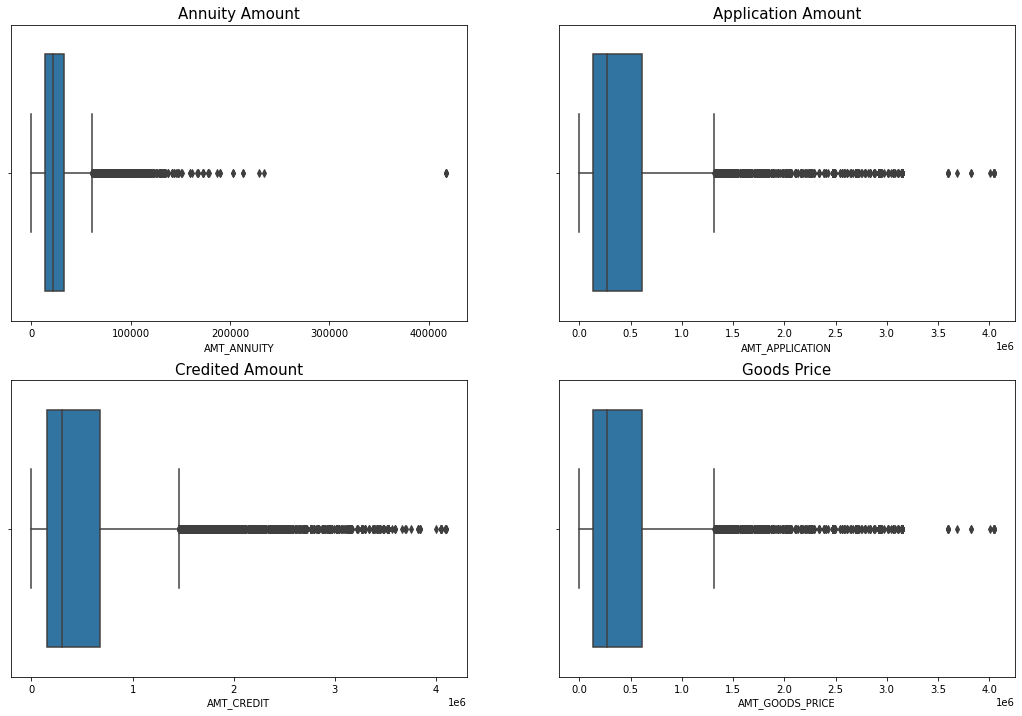

In [27]:
plt.figure(figsize = (18,12))
plt.subplot(2,2,1)
plt.title("Annuity Amount", fontsize=15)
sns.boxplot(prev_data.AMT_ANNUITY)

plt.subplot(2,2,2)
plt.title("Application Amount",fontsize=15)
sns.boxplot(prev_data.AMT_APPLICATION)

plt.subplot(2,2,3)
plt.title("Credited Amount",fontsize=15)
sns.boxplot(prev_data.AMT_CREDIT)

plt.subplot(2,2,4)
plt.title("Goods Price",fontsize=15)
sns.boxplot(prev_data.AMT_GOODS_PRICE)

plt.show()

Inferences from Plot:

1. Maximum clients have applied/got loans for amount range of 250,000 - 300,000.
2. Maximum value of annuity is around 21000.
3. Outliers are present in all the numerical variables.

##### let's create bins for some requied numerical variables. This will help us in the analysis phase.

In [28]:
# Creating bins for 'AMT_APPLICATION'
bins = [0,500000,1000000,1500000,2000000,2500000,3000000,3500000,4000000,4500000]
groups = ['0-500000', '500000-1000000','1000000-1500000','1500000-2000000','2000000-2500000','2500000-3000000',
          '3000000-3500000','3500000-4000000','4000000 & Above']
prev_data['AMT_APPLICATION_GROUP'] = pd.cut(prev_data['AMT_APPLICATION'],bins,labels=groups)

In [29]:
# Creating bins for 'CNT_PAYMENT'
bins = [0,10,20,30,40,50,60]
groups = ['0-10', '10-20','20-30','30-40','40-50','50-60']
prev_data['CNT_PAYMENT_GROUP'] = pd.cut(prev_data['CNT_PAYMENT'],bins,labels=groups)

In [30]:
# Creating bins for 'AMT_ANNUITY'
bins = [0,25000,50000,75000,100000,125000,150000,175000,200000,400000]
groups = ['0-25000', '25000-50000','50000-75000','75000-100000','100000-125000','125000-150000','150000-175000',
          '175000-200000', '200000 & Above']
prev_data['AMT_ANNUITY_GROUP'] = pd.cut(prev_data['AMT_ANNUITY'],bins,labels=groups)

##  Task 3: Univariate Analysis
#### Since the data is all cleaned up now. Lets start with the Univariate Analysis for Prev_data

- ### Subtask 3.1: Univariate Analysis of Numerical Columns

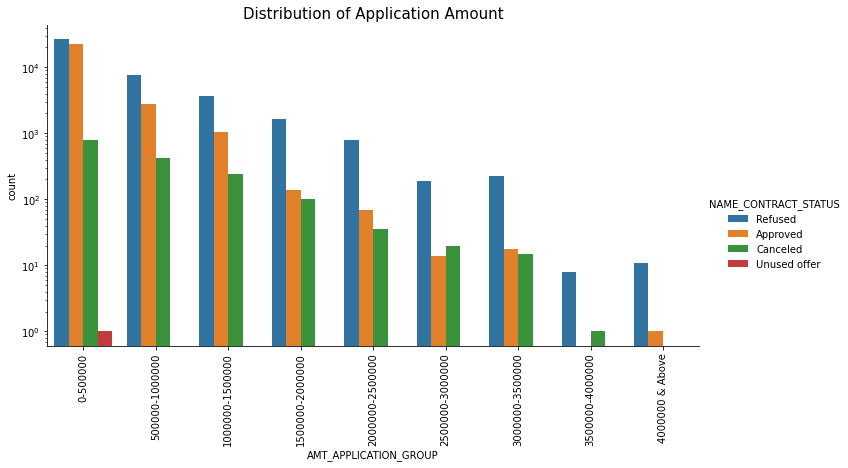

In [31]:
#Distribution of Amount Credit
sns.catplot(x='AMT_APPLICATION_GROUP',kind="count",hue='NAME_CONTRACT_STATUS',data=prev_data, height=5, aspect=2)
plt.xticks(rotation=90)
plt.yscale('log')
plt.title("Distribution of Application Amount",fontsize=15)
plt.show()

Inferences from Plot:
1. Lower loan amounts have been cancelled by client and higher loan amounts are cancelled by company.
2. For the range of 2,500,000 to 4,000,000, number of loans canceled is greater or almost equal to number of loans approved.
3.For the amount greater than 3,500,000, loans mostly not approved.

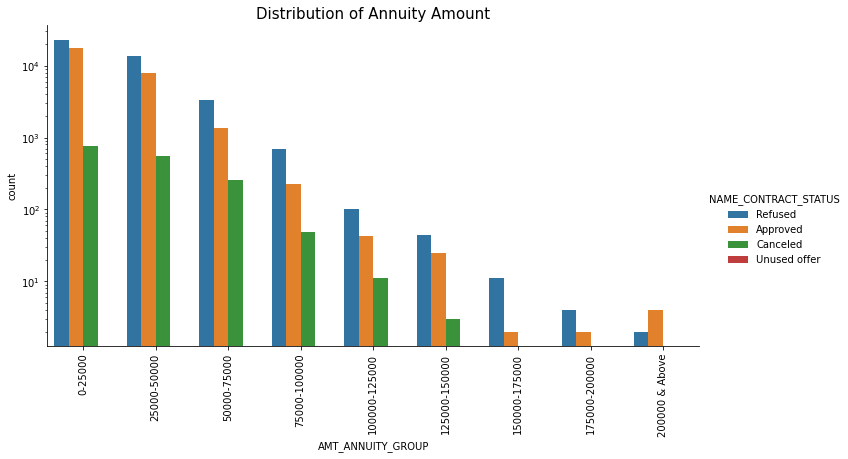

In [32]:
#Distribution of Annuity Amount
sns.catplot(x='AMT_ANNUITY_GROUP',kind="count",hue='NAME_CONTRACT_STATUS',data=prev_data, height=5, aspect=2)
plt.xticks(rotation=90)
plt.yscale('log')
plt.title("Distribution of Annuity Amount",fontsize=15)
plt.show()

Inferences from Plot:

1. Maximum number of loans are for low Annuity amount.
2. Low annuity loans also have high number of Refused, Approved, and Canceled applications.

- ### Subtask 3.2: Univariate Analysis of Categorical Columns

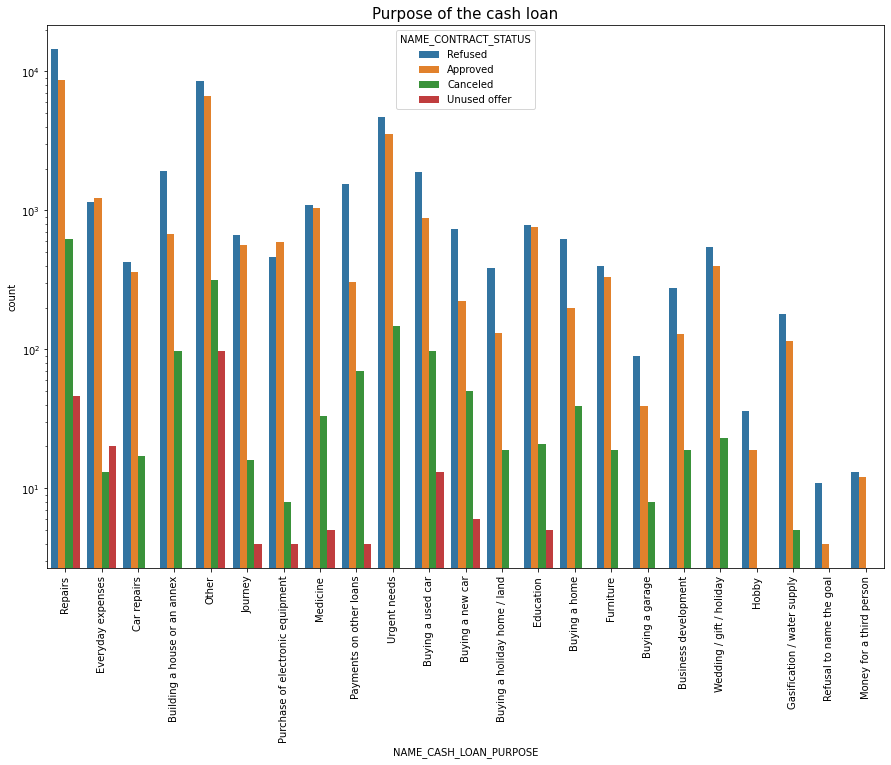

In [33]:
plt.figure(figsize=[15,10])
sns.countplot(prev_data.NAME_CASH_LOAN_PURPOSE,hue =prev_data.NAME_CONTRACT_STATUS)
plt.xticks(rotation=90)
plt.yscale('log')
plt.title("Purpose of the cash loan",fontsize=15)
plt.show()


Inferences from Plot:

1. Highest number of loans 'Approved','Refused' and 'Cacnceled' are for 'Repairs','Other' and 'Urgent Needs'
2. For 'Everyday Expenses',' Purchase of Electronic  Equipment' and 'Education', loans approved are more or almost equal to    loans refused.
3. In all the categories maximum clients cancel there application in approval phase only. This could be due to change in decision or worse pricing.
4. Payign other loans and buying a new car and buying a home are having significantly higher rejections than approvals.

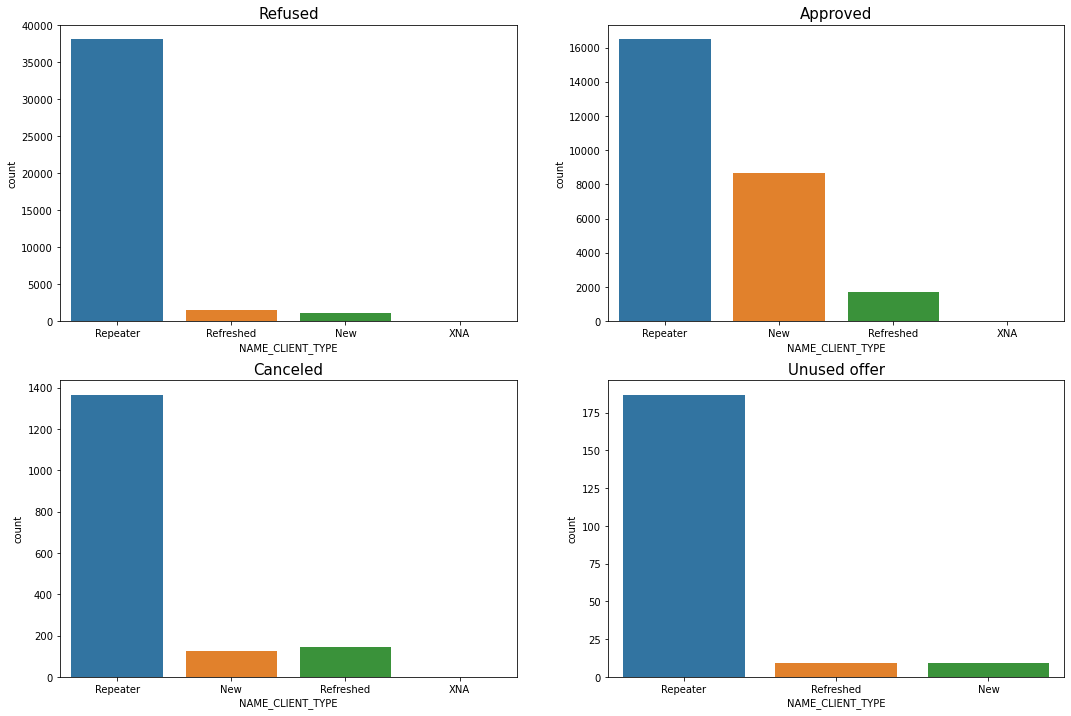

In [34]:
plt.figure(figsize = (18,12))
plt.subplot(2,2,1)
plt.title("Refused",fontsize=15)
sns.countplot(prev_data[prev_data.NAME_CONTRACT_STATUS=='Refused'].NAME_CLIENT_TYPE)

plt.subplot(2,2,2)
plt.title("Approved",fontsize=15)
sns.countplot(prev_data[prev_data.NAME_CONTRACT_STATUS=='Approved'].NAME_CLIENT_TYPE)

plt.subplot(2,2,3)
plt.title("Canceled",fontsize=15)
sns.countplot(prev_data[prev_data.NAME_CONTRACT_STATUS=='Canceled'].NAME_CLIENT_TYPE)

plt.subplot(2,2,4)
plt.title("Unused offer",fontsize=15)
sns.countplot(prev_data[prev_data.NAME_CONTRACT_STATUS=='Unused offer'].NAME_CLIENT_TYPE)

plt.show()

Inferences from Plot:

1. Most of the new applicants get the loan approved.
2. Repeaters have the highest number of loan refusals.

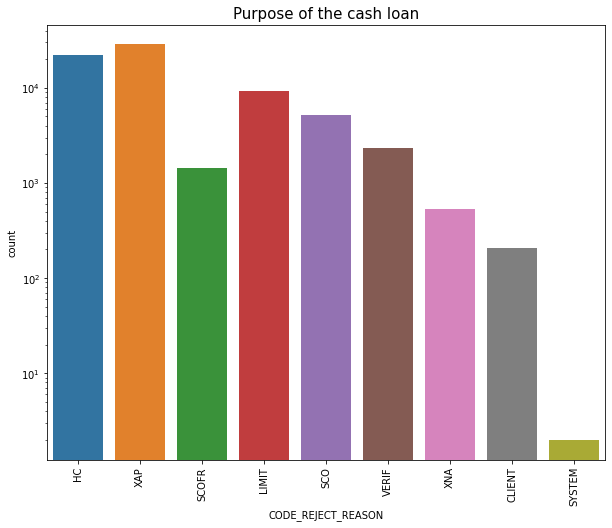

In [35]:
plt.figure(figsize=[10,8])
sns.countplot(prev_data.CODE_REJECT_REASON)
plt.xticks(rotation=90)
plt.yscale('log')
plt.title("Purpose of the cash loan",fontsize=15)
plt.show()

Inferences from Plot:

1. Most popular reason of loadn rejection is HC followed by LIMIT and SCO
2. Very few loans got reject due to the reason SYSTEM.

##  Task 4: Bivariate Analysis


- ### Subtask 4.1: Analysis of Numerical Columns

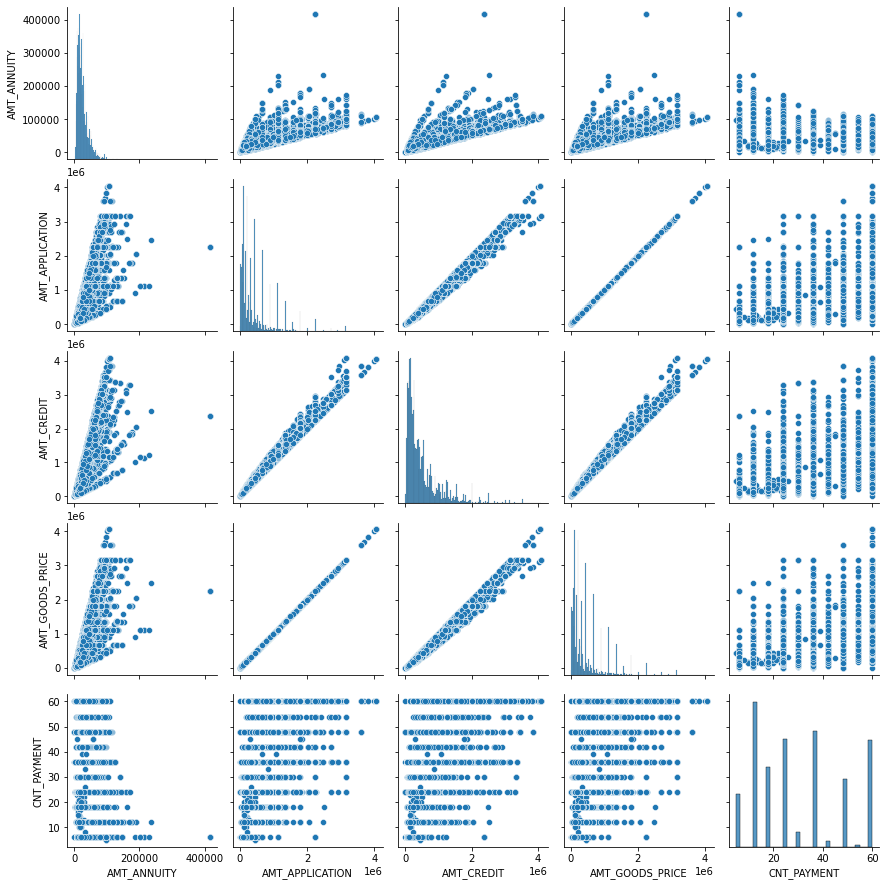

In [36]:

sns.pairplot(data=prev_data,vars=['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','CNT_PAYMENT'])
plt.show()

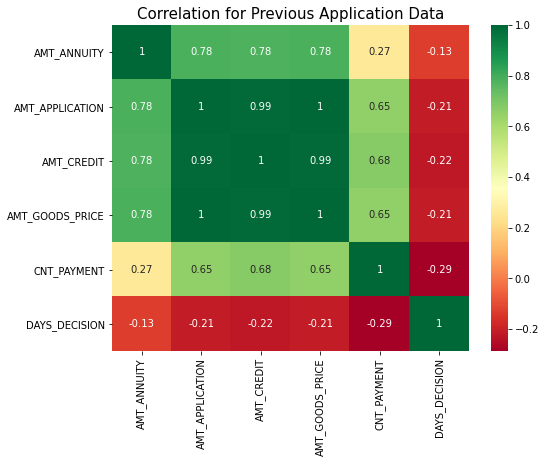

In [37]:
plt.figure(figsize=[8,6])
sns.heatmap(prev_data[['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','CNT_PAYMENT','DAYS_DECISION']].corr(), annot=True, cmap="RdYlGn")
plt.title("Correlation for Previous Application Data",fontsize = 15)
plt.show()

- ### Subtask 4.2: Analysis of Numerical vs Categorical

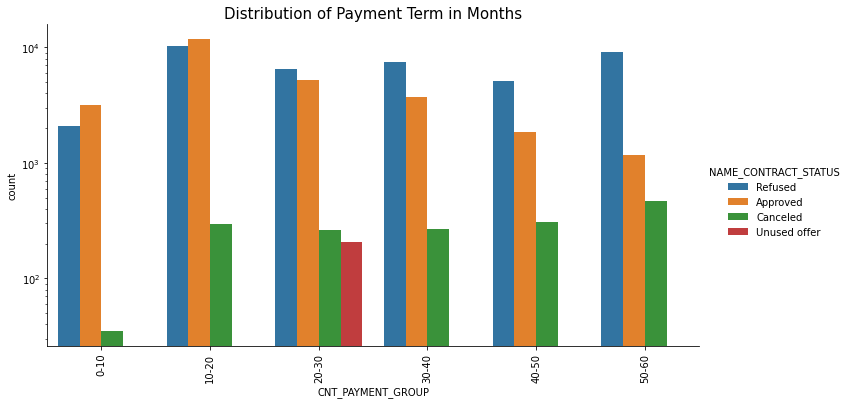

In [38]:
# Distribution of Payment Term
sns.catplot(x='CNT_PAYMENT_GROUP',kind="count",hue='NAME_CONTRACT_STATUS',data=prev_data, height=5, aspect=2)
plt.xticks(rotation=90)
plt.yscale('log')
plt.title("Distribution of Payment Term in Months",fontsize=15)
plt.show()

Inferences from Plot:

1. For shorter payement terms (upto 20 months), Approved loans are more than that of refuse ones.
2. All the loans canceled by client, on a different stage than approval is for the term range of 20-30 months.
3. Number of loans canceled by client during apporval phase increases with increasing tenure.
4. Highest number of loans approved are for the tenure 10-20 months and same for loan refused is for 10-20 and 50-60 months.

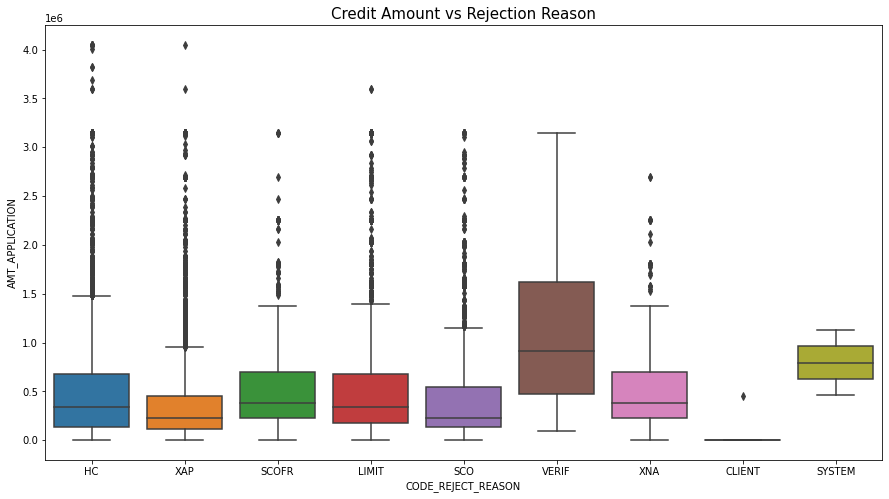

In [39]:
plt.figure(figsize=[15,8])
sns.boxplot(x  = 'CODE_REJECT_REASON', y = 'AMT_APPLICATION', data = prev_data)
plt.title('Credit Amount vs Rejection Reason',fontsize = 15)
plt.show()

Inferences from Plot:

1. Loans which have been rejected with  reason VERIF and SYSTEM have been consistently applied for  higher amount
2. Still the highest amount of loan rejected is due the reason HC, but this is due handful of outliers.

- ### Subtask 4.3: Analysis of Categorical vs Categorical

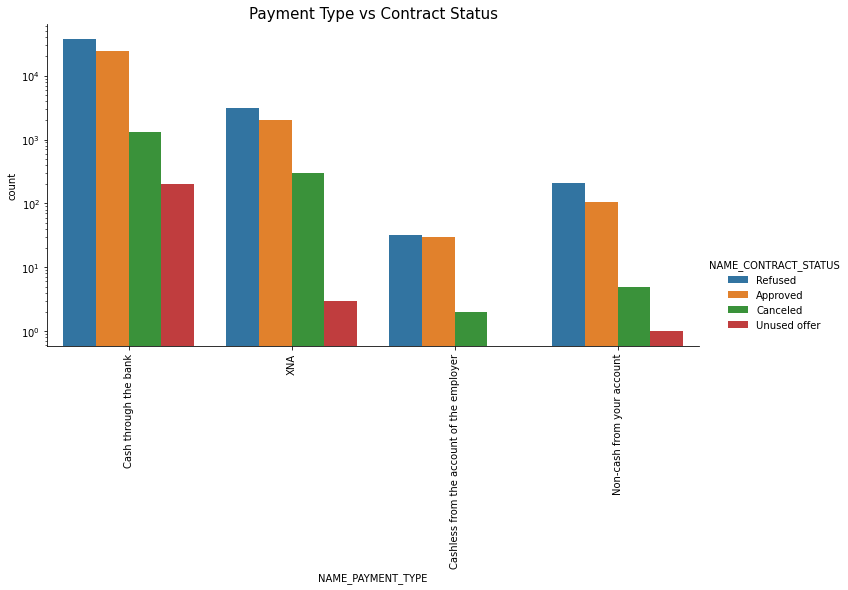

In [40]:
sns.catplot(x='NAME_PAYMENT_TYPE',kind="count",hue='NAME_CONTRACT_STATUS',data=prev_data, height=5, aspect=2)
plt.xticks(rotation=90)
plt.yscale('log')
plt.title("Payment Type vs Contract Status",fontsize=15)
plt.show()

Inferences from Plot:

1. Maximum number of loans approved, canceled and refused and unused offer are for clients who pay cash through bank.


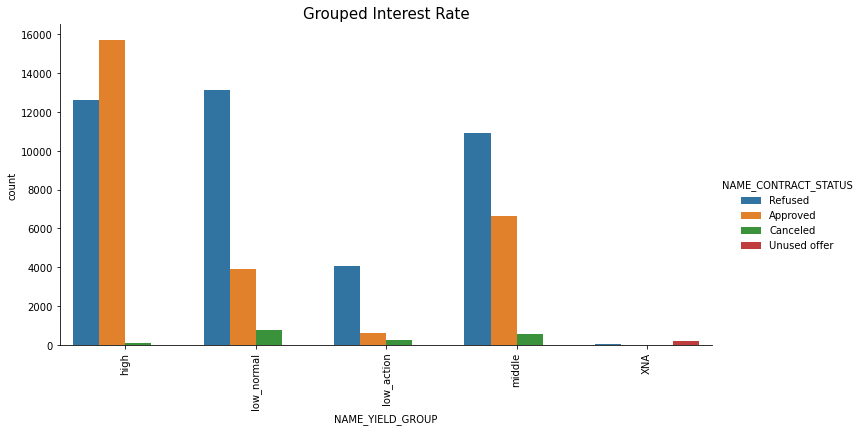

In [41]:
sns.catplot(x='NAME_YIELD_GROUP',kind="count",data=prev_data,hue='NAME_CONTRACT_STATUS',height=5, aspect=2)
plt.xticks(rotation=90)
plt.title('Grouped Interest Rate',fontsize = 15)
plt.show()

Inferences from Plot:

1. Maximum number of loans approved are of high interest rate
2. Maximum number of loans refused are of Low_normal interest rate.
3. As the interest rate Increase, number of approved loans increase.

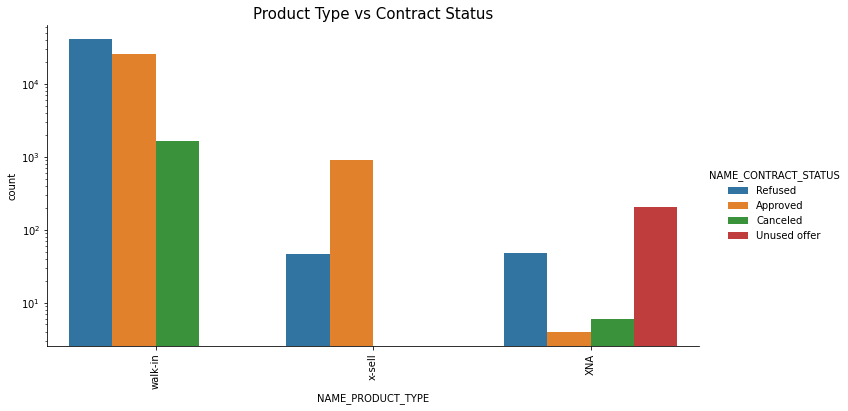

In [42]:
sns.catplot(x='NAME_PRODUCT_TYPE',kind="count",hue='NAME_CONTRACT_STATUS',data=prev_data, height=5, aspect=2)
plt.xticks(rotation=90)
plt.yscale('log')
plt.title("Product Type vs Contract Status",fontsize=15)
plt.show()

Inferences from Plot:

1. x-sell products have more approved loans than refused ones.
2. Maximum applications are of Walk-in type.


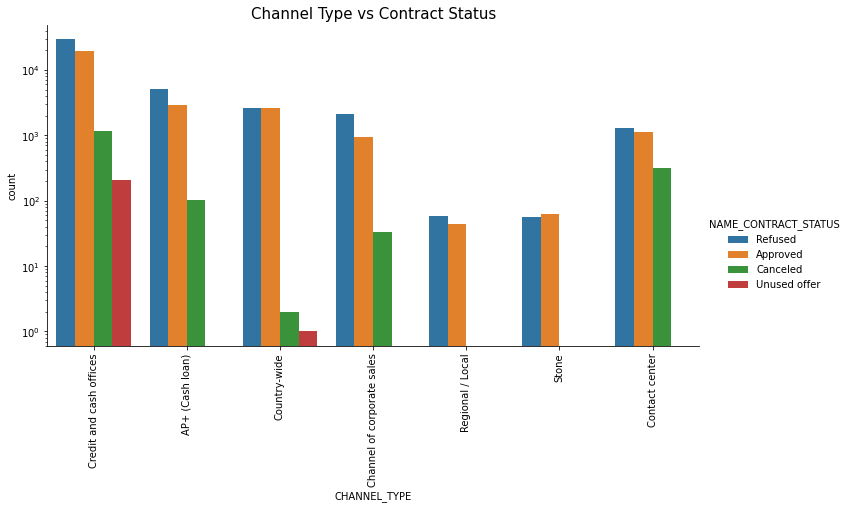

In [43]:
sns.catplot(x='CHANNEL_TYPE',kind="count",hue='NAME_CONTRACT_STATUS',data=prev_data, height=5, aspect=2)
plt.xticks(rotation=90)
plt.yscale('log')
plt.title("Channel Type vs Contract Status",fontsize=15)
plt.show()

Inferences from Plot:

1. Most of the clients are acquired through Credit and Cash channel. This has most number of approved loans
2. Maximum number of canceled loans come from Credit and Cash offices an Contact Center Channels.
3. Country-Wide channel has same number of Approved and Refused loans.

##  Task 5: Read and Clean Application Data

In [44]:
appl = pd.read_csv('application_data.csv')

In [45]:
# Filtering Columns where Null Value percentage is more than 50%
tempdf = appl.isnull().sum()/(appl.shape[0])*100
tempdf = tempdf[tempdf>=50]
filter_cols = [cols for cols in tempdf.index]


In [46]:
# Dropping the Columns with high percentage of NULL Values
appl.drop(filter_cols,axis=1,inplace=True)

In [47]:
filter_cols = [col for col in appl if col.startswith('FLAG')]

In [48]:
col_list = ['YEARS_BEGINEXPLUATATION_AVG', 
           'FLOORSMAX_AVG',
           'YEARS_BEGINEXPLUATATION_MODE',
           'FLOORSMAX_MODE',
           'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE',
            'EMERGENCYSTATE_MODE','DAYS_LAST_PHONE_CHANGE',
            'HOUR_APPR_PROCESS_START',
            'REG_REGION_NOT_LIVE_REGION',
            'REG_REGION_NOT_WORK_REGION',
            'LIVE_REGION_NOT_WORK_REGION',
            'REG_CITY_NOT_LIVE_CITY',
            'REG_CITY_NOT_WORK_CITY',
            'LIVE_CITY_NOT_WORK_CITY',
            'AMT_REQ_CREDIT_BUREAU_HOUR',
            'AMT_REQ_CREDIT_BUREAU_DAY',
            'AMT_REQ_CREDIT_BUREAU_WEEK',
            'AMT_REQ_CREDIT_BUREAU_MON',
            'AMT_REQ_CREDIT_BUREAU_QRT',
            'AMT_REQ_CREDIT_BUREAU_YEAR']
            
filter_cols.extend(col_list)

In [49]:
appl.drop(filter_cols,axis=1,inplace=True)

In [50]:
appl['DAYS_REGISTRATION'] = appl['DAYS_REGISTRATION'].astype('int64')
appl['CNT_FAM_MEMBERS'] = appl['CNT_FAM_MEMBERS'].astype(pd.Int64Dtype())

In [51]:
# Taking the absolute days for day columns instead of negative values
col_list = ['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']
for col in col_list:
    appl[col] = appl[col].abs()

In [52]:
# Creating Rnage interval based on quantile values
col_list = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']
for col in col_list:
    bins = [np.percentile(appl[col].dropna(),0),np.percentile(appl[col].dropna(),25),np.percentile(appl[col].dropna(),75),np.percentile(appl[col].dropna(),100)]
    labels = ['Low','Medium','High']
    appl[col+'_RANGE']=pd.cut(appl[col], bins= bins, labels= labels)
    

In [53]:
# Deriving age from Days birth column
appl['AGE']= appl['DAYS_BIRTH']/365

In [54]:
# Creating range for Age
bins = [0,10,20,30,40,50,60,70,80]
labels = ["0-10","10-20","20-30","30-40","40-50","50-60","60-70","70-80"]
appl['AGE_RANGE'] = pd.cut(appl['AGE'], bins= bins, labels= labels)

##  Task 6: Merging Application and Previous Application

In [55]:
final_df=pd.merge(left=appl,right=prev_data,how='inner',on='SK_ID_CURR',suffixes=('_APP','_PREV'))
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59413 entries, 0 to 59412
Data columns (total 61 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   SK_ID_CURR                       59413 non-null  int64   
 1   TARGET                           59413 non-null  int64   
 2   NAME_CONTRACT_TYPE_APP           59413 non-null  object  
 3   CODE_GENDER                      59413 non-null  object  
 4   CNT_CHILDREN                     59413 non-null  int64   
 5   AMT_INCOME_TOTAL                 59413 non-null  float64 
 6   AMT_CREDIT_APP                   59413 non-null  float64 
 7   AMT_ANNUITY_APP                  59406 non-null  float64 
 8   AMT_GOODS_PRICE_APP              59354 non-null  float64 
 9   NAME_TYPE_SUITE                  59218 non-null  object  
 10  NAME_INCOME_TYPE                 59413 non-null  object  
 11  NAME_EDUCATION_TYPE              59413 non-null  object  
 12  NAME

##  Task 7: Analysis on Merged Data

<Figure size 720x360 with 0 Axes>

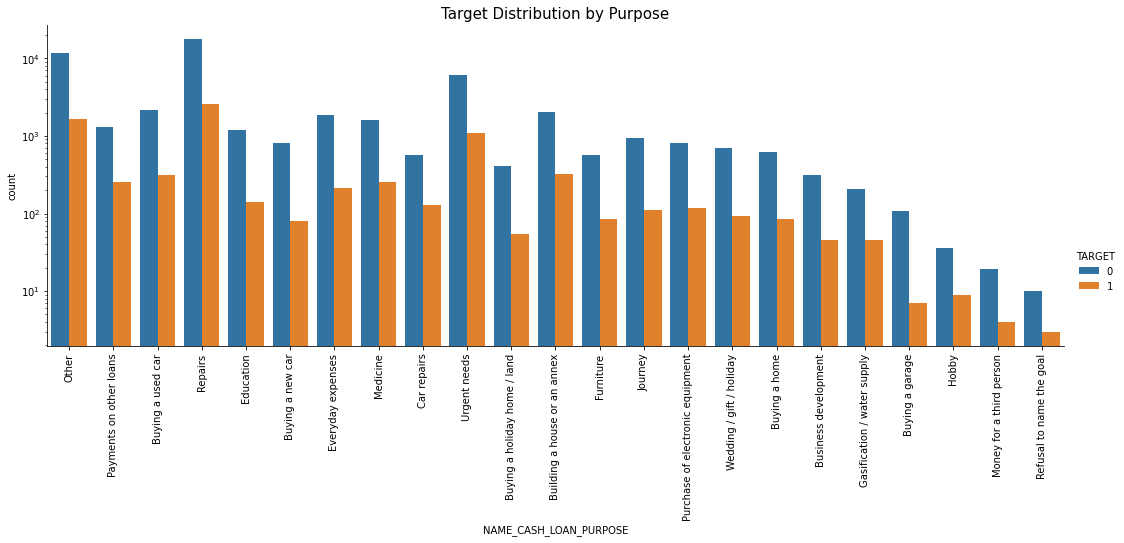

In [56]:
plt.figure(figsize=(10,5))
#plt.rcParams["xtick.labelsize"] = 15
sns.catplot(x='NAME_CASH_LOAN_PURPOSE',kind="count",hue='TARGET',height=5, aspect=3,data=final_df)
plt.xticks(rotation=90)
plt.yscale('log')
plt.title("Target Distribution by Purpose", fontsize=15)
plt.show()

Inferences from plot:
1. Loan purposes with 'Repairs' are facing more difficultIes in paying on time.
2. Minimum payment difficulties are observed in Loan Purposes with 'Hobby', 'Buying a garage', 'Money for a third person' and ' Buying a new car'

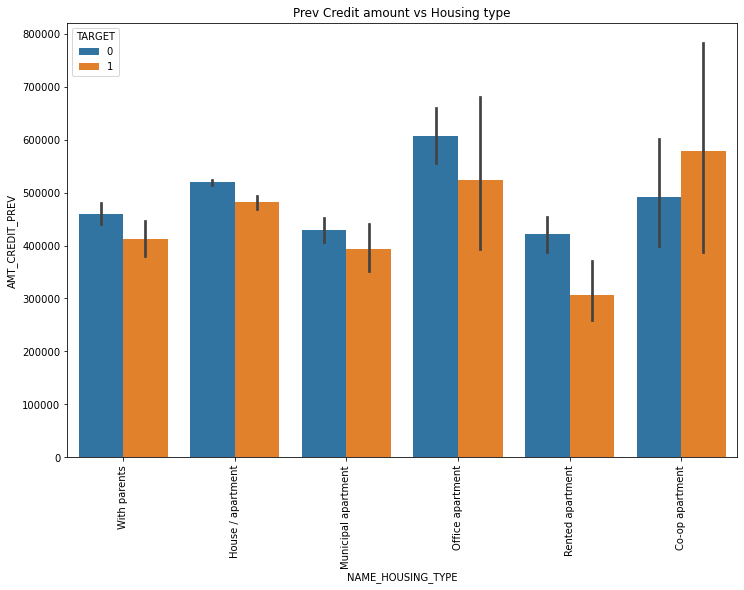

In [57]:
#Bar plot for Credit amount prev vs Housing type in logarithmic scale
plt.figure(figsize=(12,8))
plt.xticks(rotation=90)
sns.barplot(data =final_df, y='AMT_CREDIT_PREV',hue='TARGET',x='NAME_HOUSING_TYPE')
plt.title('Prev Credit amount vs Housing type')
plt.show()

Inferences from plot:

1. Housing type, 'Office apartment' is having higher credit of target 0 and 'Co-op apartment' is having higher credit of target1. Hence, bank should avoid giving loans to clients having hosing type 'Co-op apartment' and should focus on clients having housing type 'Office apartment'.

##  Task 8: Conclusion

1. Bank should focus less on loan purpose 'Repair' as they are having maximum number of delayed payments.
2. Bank should avoid giving loans to clients having hosing type 'Co-op apartment' and should focus on clients having   housing type 'Office apartment'
3. Bank should accommodate the loan terms under 20 months to increase customer base and avoid cancellation from client side.
4. New applicants seems to get more loan approved than repeaters.
5. In all the categories maximum clients cancel there application in approval phase only. This could be due to change in decision or worse pricing. Bank can look into this issue to increase the client base.
